In [1]:
import pandas as pd
import numpy as np
import os
import sys
import glob
import gc

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import re

In [4]:
article_data = '/notebook/stock/sam/article/'
seed_data = '/notebook/stock/sam/seed/'

In [5]:
price_data = '/notebook/stock/sam/price/samsung_20200602_20171219.csv'
precent_data = '/notebook/stock/sam/price/percent_samsung_06_02.csv'

In [6]:
price_df = pd.read_csv(price_data)
percent_df = pd.read_csv(precent_data)

In [7]:
seed_all = glob.glob(seed_data + '/*.csv')
print(len(seed_all))
article_all = glob.glob(article_data + '/*.csv')
print(len(article_all))

35
35


In [8]:
seed_df = []
article_df = []

for seed_file, art_file  in zip(seed_all, article_all):
    df_seed = pd.read_csv(seed_file, index_col=None, header = 0)
    df_art = pd.read_csv(art_file, index_col=None, header = 0)
    seed_df.append(df_seed)
    article_df.append(df_art)
seed_df = pd.concat(seed_df, axis=0, ignore_index=True)
article_df = pd.concat(article_df, axis=0, ignore_index=True)

In [9]:
article_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 3 columns):
head    3611 non-null object
text    7416 non-null object
url     7421 non-null object
dtypes: object(3)
memory usage: 174.1+ KB


In [10]:
seed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 5 columns):
title      7421 non-null object
url        7421 non-null object
press      7421 non-null object
summary    7421 non-null object
date       7421 non-null object
dtypes: object(5)
memory usage: 290.0+ KB


In [11]:
seed_df.head()

,title,url,press,summary,date
0,반포3주구 홍보전 과열 양상…허울뿐인 '클린수주'?,/news/news_read.nhn?article_id=0000025040&offi...,더팩트,지난 6일 삼성 준법감시위원회의 권고에 따라 이재용 삼성전자 부회장은 경영권 승계 ...,2020-05-08 00:00
1,"삼성 준법감시위, 이재용 사과 관련 구체적 실천방안 마련해야",/news/news_read.nhn?article_id=0002998933&offi...,중앙일보,삼성 준법감시위원회가 7일 이재용(52) 삼성전자 부회장의 대국민 사과와 관련해 “...,2020-05-08 00:04
2,"삼성 준법위 ""이재용 사과 의미있게 평가…구체적인 실천방안 뒷받침돼야""",/news/news_read.nhn?article_id=0003463155&offi...,세계일보,삼성 관계사에도 개선방안 마련 주문 이재용 삼성전자 부회장이 지난 6일 서울 서초동...,2020-05-08 00:13
3,갤럭시 Z 플립 원하는대로 접히는 '하이드어웨이 힌지' 기술,/news/news_read.nhn?article_id=0009851418&offi...,뉴시스,모바일 기술의 한계를 넘어선 삼성전자의 ‘갤럭시 Z 플립(Galaxy Z Flip)...,2020-05-08 00:31
4,삼성준법위 이재용 사과 의미있게 평가… 노동3권 보장 등 실행방안 마련해 달라,/news/news_read.nhn?article_id=0003284922&offi...,동아일보,삼성 준법감시위원회가 이재용 삼성전자 부회장의 대국민 사과에 대해 “의미 있다”고 ...,2020-05-08 03:03


In [12]:
article_df.head()

,head,text,url
0,삼성물산 vs 대우건설 경쟁 과열…네가티브 공세불법 홍보 버젓이 이뤄져,[더팩트｜윤정원 기자] 삼성물산과 대우건설이 접전을 펼치고 있는 서울 서초구 반포주...,/news/news_read.nhn?article_id=0000025040&offi...
1,준법 의지 표명은 의미있게 평가노동3권 실효성 있는 보장 등 필요삼성에 상세 개선방...,삼성 준법감시위원회가 7일 이재용(52) 삼성전자 부회장의 대국민 사과와 관련해 “...,/news/news_read.nhn?article_id=0002998933&offi...
2,NaN,이재용 삼성전자 부회장이 지난 6일 서울 서초동 사옥에서 경영권 승계와 노동조합 문...,/news/news_read.nhn?article_id=0003463155&offi...
3,능선(ridge) 형태의 듀얼 CAM 메커니즘이 핵심 기술단계별 각도조절 가능한 폴...,[서울=뉴시스] 김종민 기자 = 모바일 기술의 한계를 넘어선 삼성전자의 ‘갤럭시 Z...,/news/news_read.nhn?article_id=0009851418&offi...
4,NaN,삼성 준법감시위원회가 이재용 삼성전자 부회장의 대국민 사과에 대해 “의미 있다”고 ...,/news/news_read.nhn?article_id=0003284922&offi...


In [13]:
text_df = pd.merge(seed_df,article_df, how = 'left', on = ['url'])

In [14]:
text_df

,title,url,press,summary,date,head,text
0,반포3주구 홍보전 과열 양상…허울뿐인 '클린수주'?,/news/news_read.nhn?article_id=0000025040&offi...,더팩트,지난 6일 삼성 준법감시위원회의 권고에 따라 이재용 삼성전자 부회장은 경영권 승계 ...,2020-05-08 00:00,삼성물산 vs 대우건설 경쟁 과열…네가티브 공세불법 홍보 버젓이 이뤄져,[더팩트｜윤정원 기자] 삼성물산과 대우건설이 접전을 펼치고 있는 서울 서초구 반포주...
1,"삼성 준법감시위, 이재용 사과 관련 구체적 실천방안 마련해야",/news/news_read.nhn?article_id=0002998933&offi...,중앙일보,삼성 준법감시위원회가 7일 이재용(52) 삼성전자 부회장의 대국민 사과와 관련해 “...,2020-05-08 00:04,준법 의지 표명은 의미있게 평가노동3권 실효성 있는 보장 등 필요삼성에 상세 개선방...,삼성 준법감시위원회가 7일 이재용(52) 삼성전자 부회장의 대국민 사과와 관련해 “...
2,"삼성 준법위 ""이재용 사과 의미있게 평가…구체적인 실천방안 뒷받침돼야""",/news/news_read.nhn?article_id=0003463155&offi...,세계일보,삼성 관계사에도 개선방안 마련 주문 이재용 삼성전자 부회장이 지난 6일 서울 서초동...,2020-05-08 00:13,NaN,이재용 삼성전자 부회장이 지난 6일 서울 서초동 사옥에서 경영권 승계와 노동조합 문...
3,갤럭시 Z 플립 원하는대로 접히는 '하이드어웨이 힌지' 기술,/news/news_read.nhn?article_id=0009851418&offi...,뉴시스,모바일 기술의 한계를 넘어선 삼성전자의 ‘갤럭시 Z 플립(Galaxy Z Flip)...,2020-05-08 00:31,능선(ridge) 형태의 듀얼 CAM 메커니즘이 핵심 기술단계별 각도조절 가능한 폴...,[서울=뉴시스] 김종민 기자 = 모바일 기술의 한계를 넘어선 삼성전자의 ‘갤럭시 Z...
4,삼성준법위 이재용 사과 의미있게 평가… 노동3권 보장 등 실행방안 마련해 달라,/news/news_read.nhn?article_id=0003284922&offi...,동아일보,삼성 준법감시위원회가 이재용 삼성전자 부회장의 대국민 사과에 대해 “의미 있다”고 ...,2020-05-08 03:03,NaN,삼성 준법감시위원회가 이재용 삼성전자 부회장의 대국민 사과에 대해 “의미 있다”고 ...
...,...,...,...,...,...,...,...
7416,신규채용 ‘비대면’ 안간힘…‘취업 가뭄’에는 역부족,/news/news_read.nhn?article_id=0010835346&offi...,KBS,"""] 삼성전자는, '삼성고시'로 불리던 대규모 필기 시험을 이달 말 온라인으로 치르...",2020-05-14 21:22,NaN,[앵커]이렇게 정부가 공공분야 일자리를 만들겠다고 하는 건 민간 분야의 채용이 위축...
7417,"트럼프 ""코로나19, 세계화 시대 끝장났다는 신호""",/news/news_read.nhn?article_id=0004638844&offi...,뉴스1,"그는 수일 전 삼성전자, 인텔, 대만의 반도체 제조업체인 TSMC 등 반도체 업체들...",2020-05-14 21:49,NaN,(서울=뉴스1) 김정한 기자 = 도널드 트럼프 미국 대통령이 코로나19의 발병과 팬...
7418,[실리콘밸리는 지금] 그래픽카드 -> 인공지능 -> 데이터센터로 끊임없이 변신하는...,/news/news_read.nhn?article_id=0004575358&offi...,매일경제,7나노 공정 반도체 생산을 할 수 있는 곳은 대만의 TSMC와 한국의 삼성전자 정도...,2020-05-14 22:02,"""엔비디아는 거대한 데이터센터 회사가 될 것""다양한 기능 통합한 연산유닛으로 승부""...","""엔비디아의 비전은 거대한 데이터 센터 회사(Data Center Company a..."
7419,[단독] '다닥다닥 일상'...불안에 떠는 삼성 건설현장 근로자,/news/news_read.nhn?article_id=0001440215&offi...,YTN,하루에 2만여 명이 드나드는 경기 평택 고덕 삼성전자 반도체2기 증설 공사 현장에서...,2020-05-14 22:13,"정부의 건설현장 대응 지침, 현장에서는 지켜지지 않아현장 직원 코로나19 확진…근로...",[앵커]하루에 2만여 명이 드나드는 경기 평택 고덕 삼성전자 반도체2기 증설 공사 ...


In [15]:
text_df['total'] = text_df['title'].str.cat(text_df['summary'], sep='. ', na_rep='')
text_df['total'] = text_df['total'].str.cat(text_df['head'], sep='. ', na_rep='')
text_df['total'] = text_df['total'].str.cat(text_df['text'], sep='. ', na_rep='')

In [16]:
text_df.iloc[1]['total']

'삼성 준법감시위, 이재용 사과 관련 구체적 실천방안 마련해야. 삼성 준법감시위원회가 7일 이재용(52) 삼성전자 부회장의 대국민 사과와 관련해 “의미있게 평가하지만 구체적인 실천방안을 마련해야 한다”고 밝혔.... 준법 의지 표명은 의미있게 평가노동3권 실효성 있는 보장 등 필요삼성에 상세 개선방안 마련 요청. 삼성 준법감시위원회가 7일 이재용(52) 삼성전자 부회장의 대국민 사과와 관련해 “의미있게 평가하지만 구체적인 실천방안을 마련해야 한다”고 밝혔다. 준법감시위는 이날 정기회의를 열고 이 부회장의 대국민 사과와 관련해 위원회의 입장을 논의했다.\n\n\n준법감시위는 이날 “이 부회장의 답변 발표가 직접 이뤄지고 준법의 가치를 실현하겠다는 의지를 표명한 점에 대해서는 의미있게 평가한다”고 했다. 다만 “구체적인 실행방안 즉 준법 의무 위반이 발생하지 않을 지속 가능한 경영 체계의 수립, 노동 3권의 실효성 있는 보장, 시민사회의 실질적 신뢰 회복을 위한 실천방안 등이 뒷받침돼야 한다고 의견을 모았다”고 밝혔다. 준법감시위는 이와 관련 “삼성전자를 비롯한 계열사에 조만간 보다 자세한 개선방안을 마련해 줄 것을 요청했다”고 덧붙였다.\n\n\n준법감시위의 박준영 커뮤니케이션팀장은 “이 부회장의 마음은 충분히 읽었지만, 아직도 비판이 계속되고 있지 않느냐”며 “위원회의 입장은 ‘선언적 의미’로는 부족하다는 취지이며, 삼성전자를 비롯한 각 계열사 준법지원인에게도 이같은 뜻을 전달했다”고 설명했다.\n\n\n이 부회장은 하루 전인 6일 준법감시위가 꼽은 경영권 승계, 노조 문제, 시민단체 소통 등 3가지 사안에 대해 사과하고 재발 방지를 약속했다. 그는 “경영권 승계로 더 이상 논란이 생기지 않도록 하겠다”며 “제 아이들에게 회사 경영권을 물려주지 않을 생각”이라고 밝혔다.\n\n\n준법위의 입장을 전달받은 삼성 7개 계열사의 준법경영팀장들은 조만간 이 부회장의 대국민 사과 내용에 기반한 ‘액션 플랜(실행 계획)’을 제출할 것으로 보인다.\n\n\n김영민 기자 b

In [17]:
def word_count(s):
    a = s.split(' ')
    return len(a)

In [18]:
def add_end_tag(s):
    a = s + '<end_tag>'
    return a

In [19]:
text_df['text_len'] = text_df['total'].map(word_count)

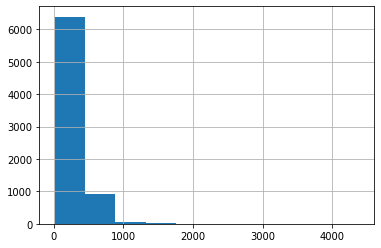

In [20]:
text_df['text_len'].hist()
plt.show()

In [21]:
def email_filter(text):
#     re_pattern = r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)"
    re_pattern = r"\S+@\S+"
    
    new_text = re.sub(re_pattern, 'email', text)
    return new_text
def url_filter(text):
    re_pattern = r"https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+"
    new_text = re.sub(re_pattern, 'url', text)
    return new_text

In [22]:
def text_clean(text):
    text = text.replace('\n', ' ')
    text = text.replace('▶', '')
    text = text.replace('\'', '"')
    text = text.split('ⓒ')[0]
    
    text = email_filter(text)
    text = url_filter(text)
    return text

In [23]:
text_df['total_clean'] = text_df['total'].map(lambda x : text_clean(x))

In [24]:
# text_df['total_clean_2'] = text_df['total_clean'].map(add_end_tag)

In [25]:
text_df['total_clean'].iloc[10]

'삼성 준법위 李 부회장 변화 의지 긍정적… 구체적 로드맵 필요. 삼성 준법감시위원회(준법위)가 이재용 삼성전자 부회장이 ‘세습 경영 및 무노조 경영 종식’을 밝힌 이른바 ‘5·6 선언’을 긍정적으로 평가했다..... 대법, 기존 재판부가 파기환송심 계속 맡을지에 대한 심리 착수. 삼성 준법감시위원회(준법위)가 이재용 삼성전자 부회장이 ‘세습 경영 및 무노조 경영 종식’을 밝힌 이른바 ‘5·6 선언’을 긍정적으로 평가했다. 다만 선언 실천을 위한 구체적인 로드맵이 필요하다고 권고했다.준법위는 7일 5차 정기회의를 열고 지난 6일 이 부회장의 대국민 사과와 5·6 선언에 대한 의견을 모았다. 오후 2시에 시작된 회의는 위원들 간 의견 조율 과정이 길어지면서 3시간 넘게 이어졌다.준법위는 입장문을 통해 “위원회 권고에 따라 이 부회장의 답변 발표가 직접적으로 이루어지고 준법의 가치를 실현하겠다는 의지를 표명한 점에 대해 의미 있게 평가한다”고 밝혔다. 또 보완해야 할 부분으로 ‘구체성’을 지적했다. 준법위는 “준법 의무 위반이 발생하지 않을 지속 가능한 경영 체계 수립, 노동 3권의 실효성 있는 보장, 시민사회의 실질적 신뢰 회복을 위한 실천 방안 등이 뒷받침돼야 한다고 의견을 모았다”며 “조만간 보다 자세한 개선 방안을 마련해줄 것을 관계사에 요청했다”고 밝혔다.이에 준법위가 준법감시 활동을 진행 중인 삼성전자, 삼성물산, 삼성SDI 등 삼성의 7개 주요 계열사가 어떻게 변화의 모습을 보일지 주목된다.이 부회장은 지난 6일 세습 경영 중단, 무노조 경영 폐지, 준법위 존속 등의 내용을 담은 입장문을 직접 발표했다. 이는 지난 3월 준법위가 권고한 내용을 모두 반영한 것으로 이 부회장은 권고문 답변 기한을 한 차례 연장한 바 있다. 늦어진 기한만큼 이 부회장의 ‘반성문’은 파격을 담은 것으로 평가됐다. 국내 대기업의 적폐로 지적돼온 ‘가족 경영’의 고리를 끊겠다고 공개적으로 발표했기 때문이다.준법위는 지난 2월 5일 삼성 계열사들의 준법 감시·통제 기능을 강화해 

In [26]:
tt = pd.read_csv('/notebook/stock/texts_and_fin2.csv')

In [27]:
tt[tt['ticker']=='MMM'].sort_values(by ='release_date').head()

,Unnamed: 0,ticker,signal,release_date,filtered_text3
21,28,MMM,stay,2015-11-10 16:27:58,"November 10, 2015, the Board of Directors of 3..."
20,27,MMM,down,2015-12-15 07:48:12,"December 15, 2015, 3M Company issued a press r..."
19,26,MMM,up,2016-01-26 07:45:17,"January 26, 2016, 3M Company issued a press re..."
18,25,MMM,up,2016-02-02 10:23:47,"February 1, 2016, the Board of Directors of 3M..."
17,24,MMM,up,2016-02-03 14:11:14,"February 2, 2016, 3M Company (the “Company”) a..."


In [28]:
price_df.head()

,일자,현재가,시가,고가,저가,거래량,거래대금
0,2020-06-02,51400,51000,51500,50800,14247933,730124
1,2020-06-01,51200,50800,51200,50600,16949183,864647
2,2020-05-29,50700,50000,50700,49700,27596961,1390446
3,2020-05-28,50400,51100,51200,49900,31309318,1585346
4,2020-05-27,49900,48950,50000,48800,19548479,969952


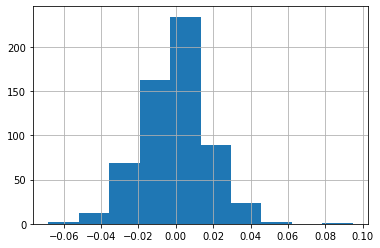

In [29]:
percent_df['현재가'].hist()

In [30]:
percent_df['signal'] = percent_df['현재가'].map(lambda x: 'up' if (x>=0.01) else ('down' if x<=-0.01 else 'stay'))

In [31]:
percent_df['signal'].value_counts()

stay    282
up      158
down    157
Name: signal, dtype: int64

In [32]:
percent_df.head()

,Unnamed: 0,일자,현재가,시가,고가,저가,거래량,거래대금,signal
0,0,2017-12-19,NaN,NaN,NaN,NaN,NaN,NaN,stay
1,1,2017-12-20,-0.013365,-0.000777,-0.006182,-0.013774,-0.188288,-0.200704,down
2,2,2017-12-21,-0.035409,-0.009804,-0.013709,-0.035031,0.354816,0.336392,down
3,3,2017-12-22,0.011268,-0.032389,-0.022018,0.002843,-0.395070,-0.398404,up
4,4,2017-12-26,-0.031120,0.007235,0.002794,-0.021577,0.301761,0.294528,down


In [33]:
def oversample(X,y):
    # Get number of rows with imbalanced class
    target = y.sum().idxmax()
    n = y[target].sum()
    # identify imbalanced targets
    imbalanced = y.drop(target,axis=1)
    #For each target, create a dataframe of randomly sampled rows, append to list
    append_list =  [y.loc[y[col]==1].sample(n=n-y[col].sum(),replace=True,random_state=20) for col in imbalanced.columns]
    append_list.append(y)
    y = pd.concat(append_list,axis=0)
    # match y indexes on other inputs
    X = X.loc[y.index]
    assert (y.index.all() == X.index.all())
    return X, y

In [34]:
text_df = text_df.rename(columns = {"total_clean": "filtered_text"})

In [35]:
text_df = text_df.sort_values(by = 'date', ascending=True, axis =0).reset_index(drop=True)
text_df.head()

,title,url,press,summary,date,head,text,total,text_len,filtered_text
0,"[경제 브리핑] 삼성전자, 미국 가전시장 4년연속 1위",/news/news_read.nhn?article_id=0002997342&offi...,중앙일보,삼성전자가 4년째 세계 최대 가전 시장인 미국에서 점유율 1위를 차지했다. 30일 ...,2020-05-01 00:03,NaN,삼성전자가 4년째 세계 최대 가전 시장인 미국에서 점유율 1위를 차지했다. 30일 ...,"[경제 브리핑] 삼성전자, 미국 가전시장 4년연속 1위. 삼성전자가 4년째 세계 최...",74,"[경제 브리핑] 삼성전자, 미국 가전시장 4년연속 1위. 삼성전자가 4년째 세계 최..."
1,"삼성전자, 美 가전 점유율 20.9%… 4년연속 1위",/news/news_read.nhn?article_id=0003283914&offi...,동아일보,1분기 프리미엄 냉장고 25% 차지… 세탁기-건조기 7개 분기 연속 선두 코로나 불...,2020-05-01 03:04,1분기 프리미엄 냉장고 25% 차지… 세탁기-건조기 7개 분기 연속 선두코로나 불황...,"삼성전자가 올해 1분기(1∼3월) 미국 시장에서 냉장고, 세탁기, 건조기 등 주요 ...","삼성전자, 美 가전 점유율 20.9%… 4년연속 1위. 1분기 프리미엄 냉장고 25...",430,"삼성전자, 美 가전 점유율 20.9%… 4년연속 1위. 1분기 프리미엄 냉장고 25..."
2,"삼성전자 가전, 美서 16분기째 1위",/news/news_read.nhn?article_id=0003527792&offi...,조선일보,삼성전자가 올 1분기 세계 최대 생활가전 시장인 미국에서 시장 점유율 1위를 차지했...,2020-05-01 03:05,NaN,삼성전자가 올 1분기 세계 최대 생활가전 시장인 미국에서 시장 점유율 1위를 차지했...,"삼성전자 가전, 美서 16분기째 1위. 삼성전자가 올 1분기 세계 최대 생활가전 시...",72,"삼성전자 가전, 美서 16분기째 1위. 삼성전자가 올 1분기 세계 최대 생활가전 시..."
3,"원통형 전기차 배터리, 3년 뒤 시장규모 2배로",/news/news_read.nhn?article_id=0001317034&offi...,국민일보,"LG화학과 삼성SDI는 LG전자, 삼성전자 등의 스마트폰과 노트북에 탑재되는 원통형...",2020-05-01 04:10,노트북·청소기 등 탑재 이어 규격이 표준화돼 대량 생산 용이,"노트북, 스마트폰 등 IT기기와 무선 청소기 등에 탑재되던 원통형 배터리가 전기차에...","원통형 전기차 배터리, 3년 뒤 시장규모 2배로. LG화학과 삼성SDI는 LG전자,...",333,"원통형 전기차 배터리, 3년 뒤 시장규모 2배로. LG화학과 삼성SDI는 LG전자,..."
4,미국 생활가전 점유율 삼성전자 4년 연속 1위,/news/news_read.nhn?article_id=0001317039&offi...,국민일보,삼성전자가 미국 생활가전 시장에서 4년 연속 점유율 1위를 차지했다. 삼성전자는 시...,2020-05-01 04:11,NaN,삼성전자가 미국 생활가전 시장에서 4년 연속 점유율 1위를 차지했다.삼성전자는 시장...,미국 생활가전 점유율 삼성전자 4년 연속 1위. 삼성전자가 미국 생활가전 시장에서 ...,162,미국 생활가전 점유율 삼성전자 4년 연속 1위. 삼성전자가 미국 생활가전 시장에서 ...


In [36]:
import datetime

In [37]:
text_df['date'].iloc[0]

'2020-05-01 00:03'

### Date process

In [38]:
text_df['day'] = text_df['date'].map(lambda x : datetime.datetime.strptime( x,'%Y-%m-%d %H:%M' ).date().strftime('%Y-%m-%d'))

In [39]:
# datetime.datetime.strptime(text_df['date'].iloc[0],'%Y-%m-%d %H:%M' ).date().strftime('%Y-%m-%d')

In [40]:
percent_df.head()

,Unnamed: 0,일자,현재가,시가,고가,저가,거래량,거래대금,signal
0,0,2017-12-19,NaN,NaN,NaN,NaN,NaN,NaN,stay
1,1,2017-12-20,-0.013365,-0.000777,-0.006182,-0.013774,-0.188288,-0.200704,down
2,2,2017-12-21,-0.035409,-0.009804,-0.013709,-0.035031,0.354816,0.336392,down
3,3,2017-12-22,0.011268,-0.032389,-0.022018,0.002843,-0.395070,-0.398404,up
4,4,2017-12-26,-0.031120,0.007235,0.002794,-0.021577,0.301761,0.294528,down


In [41]:
percent_df['일자'].sort_values().iloc[-30:]

567    2020-04-17
568    2020-04-20
569    2020-04-21
570    2020-04-22
571    2020-04-23
572    2020-04-24
573    2020-04-27
574    2020-04-28
575    2020-04-29
576    2020-05-04
577    2020-05-06
578    2020-05-07
579    2020-05-08
580    2020-05-11
581    2020-05-12
582    2020-05-13
583    2020-05-14
584    2020-05-15
585    2020-05-18
586    2020-05-19
587    2020-05-20
588    2020-05-21
589    2020-05-22
590    2020-05-25
591    2020-05-26
592    2020-05-27
593    2020-05-28
594    2020-05-29
595    2020-06-01
596    2020-06-02
Name: 일자, dtype: object

In [42]:
percent_df[percent_df['일자']=='2020-05-10']

,Unnamed: 0,일자,현재가,시가,고가,저가,거래량,거래대금,signal


In [43]:
merge_df = pd.merge(text_df, percent_df, how='left', left_on=['day'], right_on=['일자'])

In [44]:
merge_df['signal'] = merge_df['signal'].fillna(method = 'bfill')
merge_df['현재가'] = merge_df['현재가'].fillna(method = 'bfill')

In [45]:
merge_df.isnull().sum()

title               0
url                 0
press               0
summary             0
date                0
head             3810
text                5
total               0
text_len            0
filtered_text       0
day                 0
Unnamed: 0       1626
일자               1626
현재가               786
시가               1626
고가               1626
저가               1626
거래량              1626
거래대금             1626
signal            786
dtype: int64

In [46]:
merge_df = merge_df.dropna(subset=['signal'])

In [47]:
merge_df.reset_index(drop=True, inplace=True)

In [48]:
testNum = int(len(merge_df) * -.1)
print(testNum)

-663


In [49]:
X_train = merge_df['filtered_text'][:testNum]
y_train = pd.get_dummies(columns=['signal'],data=merge_df['signal'])[:testNum].iloc[:, :]
test = merge_df.loc[list(set(list(merge_df.index)) - set(list(X_train.index)))]
X_test = test['filtered_text']
y_test = test['signal']

In [50]:
X_train, y_train = oversample(X_train, y_train)

In [51]:
y_train

,down,stay,up
2127,1,0,0
271,1,0,0
4512,1,0,0
2046,1,0,0
4580,1,0,0
...,...,...,...
5967,0,1,0
5968,0,1,0
5969,0,1,0
5970,0,1,0


In [52]:
y_train["signal"] = np.nan

In [53]:
for i, y in y_train.iterrows():
    if str(type(y_train.loc[i])) == "<class 'pandas.core.frame.DataFrame'>": # If an index only has one observation, it draws up an error if we try to use the indexer agaon
        # They're usually classed as a series while the ones with many observations are considered a df. This is a way to get
        # rid of them
        if y_train.loc[i].iloc[0, 0] == 1:
            y_train.loc[i, "signal"] = "down"
        elif y_train.loc[i].iloc[0, 1] == 1:
            y_train.loc[i, "signal"] = "stay"
        else:
            y_train.loc[i, "signal"] = "up"
    else: # If they only have one observation, we settle it here instead
        if y_train.loc[i][0] == 1:
              y_train.loc[i, "signal"] = "down"
        elif y_train.loc[i][1] == 1:
            y_train.loc[i, "signal"] = "stay"
        else:
            y_train.loc[i, "signal"] = "up"

In [54]:
X_train2 = X_train.reset_index(drop = True)
y_train2 = y_train['signal'].reset_index(drop = True)

data = pd.concat([X_train2, y_train2], axis = 1)
data.rename(columns = {"filtered_text":"doc"}, inplace = True)

X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

train = data
test = pd.concat([X_test, y_test], axis = 1) 
test.rename(columns = {"filtered_text":"doc"}, inplace = True)

In [55]:
test

,doc,signal
0,잘 다니던 삼성전자 관둔다고 하니 부모님부터 말렸죠. 인터뷰에서 “삼성전자에서 전자...,stay
1,"무더위 맞이하는 가전업계…삼성-LG ""여름가전"" 대전 돌입. 여름철 대표가전이라고 ...",stay
2,[포스트 코로나(1)-전자] 생존 위한 내실 초점…생산·기술 경쟁력 키운다. 국내 ...,stay
3,"‘언택트’ 펀드 출시 봇물… ""무슨 종목 담는지 잘 보세요"". 관련된 삼성전자(00...",stay
4,돈 굴릴 곳이 없네… 0%대 금리에도 예·적금 못 떠나는 사람들. 그러나 개인 투자...,stay
...,...,...
658,‘바이오-언택트’ 서정진-김범수-김택진 주식부자 순위 껑충. 삼성전자 이건희 회장과...,stay
659,"[용품] ""홀까지 거리는 □□㎝ 입니다""…거리측정기는 기술 전쟁중. 올해 2월 말 ...",stay
660,삼성이 포문 연 온라인 공채 시험… 무난히 합격점. 삼성전자에 따르면 지난 30일에...,stay
661,‘바이오·언택트’ 열풍에… 시총 10위 비중 45%로. 31일 한국거래소에 따르면 ...,stay


### BERT Model

In [56]:
import tensorflow as tf
import keras as keras
import keras.backend as K
from keras.models import load_model

from keras_bert import load_trained_model_from_checkpoint, load_vocabulary
from keras_bert import Tokenizer
from keras_bert import AdamWarmup, calc_train_steps
from keras_bert import get_pretrained, PretrainedList, get_checkpoint_paths

Using TensorFlow backend.


In [57]:
from tqdm import tqdm
import gc

In [58]:
model_path = get_pretrained(PretrainedList.multi_cased_base)
paths = get_checkpoint_paths(model_path)
print(paths.config, paths.checkpoint, paths.vocab)

/root/.keras/datasets/multi_cased_L-12_H-768_A-12/bert_config.json /root/.keras/datasets/multi_cased_L-12_H-768_A-12/bert_model.ckpt /root/.keras/datasets/multi_cased_L-12_H-768_A-12/vocab.txt


In [59]:
DATA_COLUMN = 'doc'
LABEL_COLUMN = 'signal'
# label_list is the list of labels
label_list = ['up', 'down', 'stay']

In [60]:
SEQ_LEN = 128
BATCH_SIZE = 16
EPOCHS = 50
LR = 1e-4

In [61]:
token_dict = load_vocabulary(paths.vocab)
tokenizer = Tokenizer(token_dict)

In [62]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb_= MultiLabelBinarizer(classes=('up', 'stay','down'))

In [63]:
def convert_data(data_df):
    global tokenizer
    indices, targets = [], []
    for i in tqdm(range(len(data_df))):
        ids, segments = tokenizer.encode(data_df[DATA_COLUMN][i], max_len=SEQ_LEN)
        indices.append(ids)
        targets.append(data_df[LABEL_COLUMN][i])
    items = list(zip(indices, targets))
    np.random.shuffle(items)
    indices, targets = zip(*items)
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)], mlb_.fit_transform(np.array(targets).reshape(-1,1))

In [64]:
train_x, train_y = convert_data(train)

100%|██████████| 7641/7641 [01:40<00:00, 75.91it/s] 


In [65]:
train_y

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [66]:
model = load_trained_model_from_checkpoint(
    paths.config,
    paths.checkpoint,
    training=True,
    trainable=True,
    seq_len=SEQ_LEN,
)

In [67]:
inputs = model.inputs[:2]
dense = model.layers[-3].output
outputs = keras.layers.Dense(3, activation='softmax', kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.02),
                             name = 'real_output')(dense)

decay_steps, warmup_steps = calc_train_steps(
    train_y.shape[0],
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
)

model = keras.models.Model(inputs, outputs)
model.compile(
    AdamWarmup(decay_steps=decay_steps, warmup_steps=warmup_steps, lr=LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [68]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        (None, 128)          0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      (None, 128)          0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 128, 768), ( 91812096    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 128, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

In [69]:
sess = K.get_session()
uninitialized_variables = set([i.decode('ascii') for i in sess.run(tf.report_uninitialized_variables())])
init_op = tf.variables_initializer(
    [v for v in tf.global_variables() if v.name.split(':')[0] in uninitialized_variables]
)
sess.run(init_op)

W0611 02:05:35.618458 140193663985472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [70]:
model.fit(
        train_x,
        train_y,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
    )

W0611 02:05:53.643377 140193663985472 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/50
7641/7641 [==============================] - 157s 21ms/step - loss: 1.0640 - accuracy: 0.4102
Epoch 2/50
7641/7641 [==============================] - 146s 19ms/step - loss: 0.9553 - accuracy: 0.5248
Epoch 3/50
7641/7641 [==============================] - 146s 19ms/step - loss: 0.8901 - accuracy: 0.5785
Epoch 4/50
7641/7641 [==============================] - 146s 19ms/step - loss: 0.8529 - accuracy: 0.6029
Epoch 5/50
7641/7641 [==============================] - 147s 19ms/step - loss: 0.9183 - accuracy: 0.5278
Epoch 6/50
7641/7641 [==============================] - 146s 19ms/step - loss: 1.1046 - accuracy: 0.3324
Epoch 7/50
7641/7641 [==============================] - 146s 19ms/step - loss: 1.1029 - accuracy: 0.3350
Epoch 8/50
7641/7641 [==============================] - 146s 19ms/step - loss: 1.1019 - accuracy: 0.3394
Epoch 9/50
7641/7641 [==============================] - 146s 19ms/step - loss: 1.1022 - accuracy: 0.3323
Epoch 10/50
7641/7641 [==============================] 

KeyboardInterrupt: 